## Monte Carlo Integration

Monte Carlo methods began as a way to estimate high dimensional integrals using probalistic methods.  Specifically monte carlo integration expresses the integral
\begin{equation}
I = \int_\Omega f(\boldsymbol{x})\;\mathrm{d}\boldsymbol{x} \approx V \frac{1}{N} \sum_{i=1}^{N} f(\boldsymbol{x}_i) = V\langle f \rangle
\end{equation}

In the below code, we approximate pi by integrating a function
\begin{equation}
f = \begin{cases}
1 & x^2 + y^2 < 1 \\
0 & \mathrm{otherwise}
\end{cases}
\end{equation}
over the domain $x\in[-1,1]$, $y\in[-1,1]$

3.160000000000002


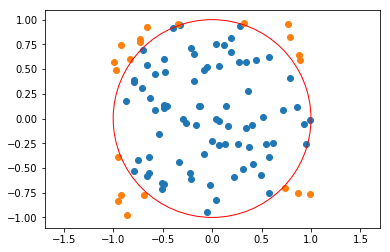

In [1]:
import numpy
from matplotlib import pyplot as plt


def estimatePi(numsamples):
    Q = 0;
    insidex= []
    outsidex = []
    insidey= []
    outsidey = []
    for i in range(0,numsamples):
        x = numpy.random.uniform(-1,1)
        y = numpy.random.uniform(-1,1)
        if x**2 + y**2 < 1:
            Q = Q + 4/numsamples
            insidex.append([x])
            insidey.append([y])
        else:
            outsidex.append([x])
            outsidey.append([y])
    return Q, insidex, insidey, outsidex, outsidey

pi, insidex, insidey, outsidex, outsidey = estimatePi(100)
print(pi)
plt.scatter(numpy.asarray(insidex),numpy.asarray(insidey))
plt.hold
plt.scatter(numpy.asarray(outsidex),numpy.asarray(outsidey))
circle1 = plt.Circle((0, 0), 1, color='r', fill=False)
ax = plt.gca()
ax.add_artist(circle1)


ax.axis('equal')   
plt.show()

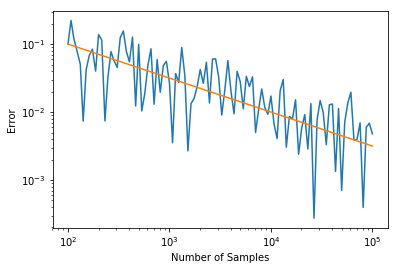

In [6]:

error = []
nsamples = []
for i, ns in enumerate(10**numpy.linspace(2,5,100)):
    #print(i,ns)numpy.sqrt((p - numpy.pi)**2)    
    p = estimatePi(numpy.int_(numpy.floor(ns)))[0]
    #print(type(p))
    e = numpy.sqrt((p - numpy.pi)**2)
    error.append(e)
    nsamples.append(numpy.int_(numpy.floor(ns)))
plt.loglog(numpy.asarray(nsamples), numpy.asarray(error))
plt.loglog(numpy.asarray(nsamples), 1/numpy.sqrt(numpy.asarray(nsamples)))
plt.xlabel('Number of Samples')
plt.ylabel('Error')
plt.show()

The error in monte carlo integration goes as $\frac{1}{\sqrt{N}}$ where $N$ is the number of samples.

## Markov Chains

A markov chain is a statistical time series process where the next iteration is determined soley based on the previous iteration.

In math language,

__Definition (Markov Chain)__ A Markov chain is a sequence of S-valued random variables
\begin{equation}
X = \{ X_i, i\in\mathbb{Z}\}
\end{equation}
that satisfy the Markov property that $X_{n+1}$ depends only on $X_n$; that is 
\begin{equation}
P(X_{n+1} = x_{n+1} |X_0 = x_0, ..., X_n = x_n) = P(X_{n+1} = x_{n+1} |X_n = x_n)
\end{equation}
where x_i is the state of the chain at time i.

Markov chain is characterized by three components: a state space S, an initial distribution $p^0$ and a transition or Markov kernel. The state space is the range of all possible random variables and is assumed to be discrete and finite, i.e. $S = \{x_1, x_2, ...x_k \}$

The transition matrix is the probility of moving from $x_i$ to $x_j$ in one step
\begin{equation}
p_{ij} = P(X_{n+1} = x_j|X_n = x_i)
\end{equation}

__Example__ Various studies have indicated that factors such as weather, injuries and unquantificble concepts such as hitting streaks lend a random nature to baseball. We assume that a team that won its previous game has a 70\% chance of winning their next game and a 30\% chance of losing, whereas a losing team wins 40\% and loses 60\% of their next games.  Hence the probability of winning or losing is conditioned on a team's last performance.

This yields a two-state Markov chain where
\begin{equation}
S = \{\mathrm{win,}\;\mathrm{lose}\}
\end{equation}
and the transition matrix is given by
\begin{equation}
P = \begin{pmatrix}
0.7 & 0.3 \\
0.4 & 0.6
\end{pmatrix}
\end{equation}

If we assume an inital distribution where 40\% of teams won their last game and 60\% lost their last game, then $p^0 = [0.4, 0.6]$.

The percentage of teams who win/lose their next game is given by
\begin{equation}
p^1 = \begin{pmatrix} 0.4 & 0.6\end{pmatrix}\begin{pmatrix}
0.7 & 0.3 \\
0.4 & 0.6
\end{pmatrix} = \begin{pmatrix} 0.52 & 0.48\end{pmatrix}
\end{equation}

The below program will calculate the first 10 iterations of the Markov chain

In [2]:
import numpy
P = numpy.asarray([[0.7, 0.3],[0.4, 0.6]])
print(P)
p0 = numpy.asarray([0.4,0.6])
print(p0)
p1 = numpy.matmul(p0,P)
print(p1)
pnext = p0
N = 10
print('\n\nMarkov Chain')
for i in range(N):
    plast = pnext
    pnext = numpy.matmul(plast,P) 
    print(pnext, i+1)

[[0.7 0.3]
 [0.4 0.6]]
[0.4 0.6]
[0.52 0.48]


Markov Chain
[0.52 0.48] 1
[0.556 0.444] 2
[0.5668 0.4332] 3
[0.57004 0.42996] 4
[0.571012 0.428988] 5
[0.5713036 0.4286964] 6
[0.57139108 0.42860892] 7
[0.57141732 0.42858268] 8
[0.5714252 0.4285748] 9
[0.57142756 0.42857244] 10


You will notice that the probability seems to converge to a specific point.  This point is called a stationary distribution.

__Definition__ For a Markov chain with transtion matrix $P$, distribution $\pi$ which satisfy
\begin{equation}
\pi = \pi P
\end{equation}
are called equilibrium or stationary distriution of the chain.

In the above example 
\begin{equation}
\pi = \begin{pmatrix}\frac{4}{7} & \frac{3}{7} \end{pmatrix}
\end{equation}
is a stationary distribution

### So?

So why did I introduce this?  Well we are going to combine markov chains and monte carlo methods named called Markov Chain Monte Carlo(mcmc) methods.  Combining the two ideas allows us to do things which are otherwise expensive.  First we are going to use markov chains inorder to sample from specific probability distributions which has extensive applications in Bayesian statistics and uncertainty quantification.  Second we are going to introduce global optimization procedure known as simulated annealing which is an adaptation of MCMC.

Before we get into this, we are going to start with the Ising model as a more complicated example

## Ising Model

The Ising model was created by Dr. Ernst ising to model ferromagnetic and anti-ferromagnetic materials.  The model represents a lattice occupied by atoms which have dipole moments which can either be up or down.  The model is typically created using a monte carlo markov chain to simulate the system.

The Hamiltonian of the system is given by 
\begin{equation}
\mathcal H = -J_{ij} \sum_{ij} s_i s_j - h \sum_i s_i
\end{equation}
where $h$ is an external field, $s_i$ is the spin of particle $i$ and $J_{ij}$ is the coupling parameter between the adjacent atoms.

The probability model says that state $S = \{s_1 = S_1, ..., s_i= S_i \}$
\begin{equation}
P(S) \propto \mathrm{e}^{-\beta \mathcal{H}}
\end{equation}


8.5


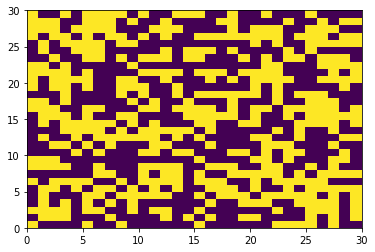

-29.5


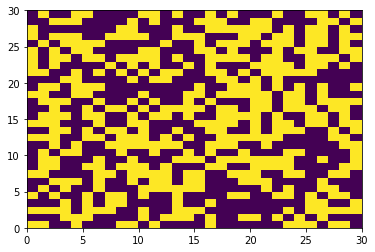

-29.5


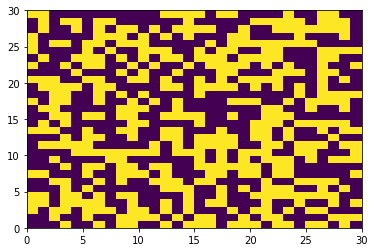

-29.5


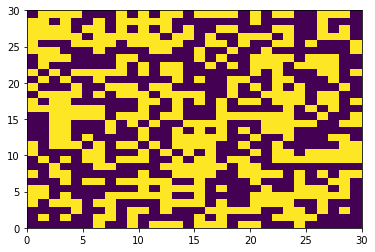

-29.5


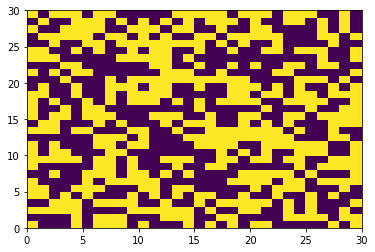

-29.5


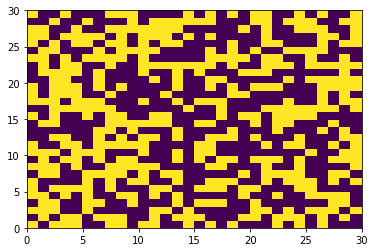

-29.5


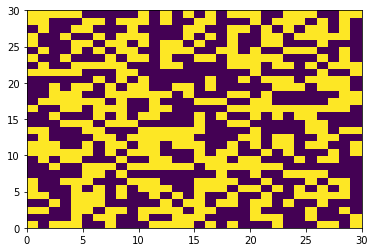

-44.5


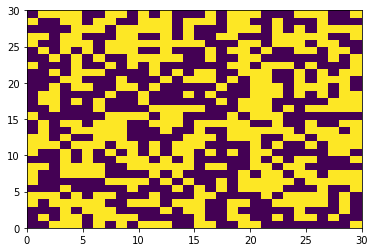

-44.5


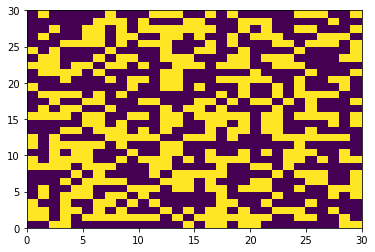

-44.5


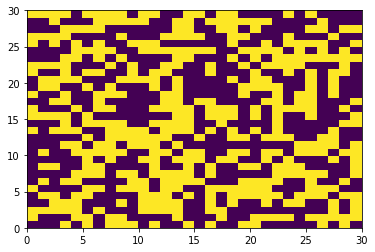

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

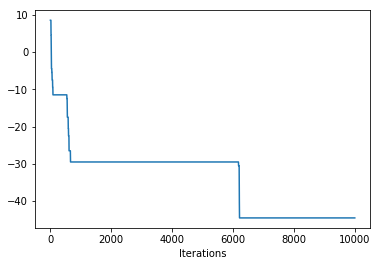

In [3]:
import numpy
from matplotlib import pyplot as plt

nx = 30
ny = 30

def Ising(T,h, niter, initialState = numpy.sign(numpy.random.randn(nx,ny))):
    def applyPeriodicBoundaries(array):

        #Sets array values of array[end,:]= array[0,:]
        array[-1,:]= array[0,:]
        array[:,-1]= array[:,0]   
        return array

    def hamiltonian(array):
        q = 0
        J = 1
        for i in range(0,nx-1):
            for j in range(0,ny-1):
                for ii in range(-1,1):
                    for jj in range(-1,1):
                        #print(i+ii,j+jj,i,j)
                        if ii != 0 and jj !=0:
                            q += -J/2*array[i,j]*array[i+ii,j+jj]
                        else:
                            #print(h)
                            #print(array[i,j])
                            q += h*array[i,j]
        return q

    
    #applyPeriodicBoundaries(initialState)  #Arrays are passed via pointers
    #niter = 100000
    #T = .1
    hLast = hamiltonian(initialState)
    hs = [hLast];
    state = initialState
    for i in range(0,niter):
        #select one particle to flip
        trialState = state
        xx = numpy.random.randint(0,nx)
        yy = numpy.random.randint(0,ny)
        trialState[xx, yy] = -1*trialState[xx, yy] #flip one 
        hTrial = hamiltonian(trialState)
        alpha = numpy.random.rand()
        #print(hLast, hTrial, numpy.exp((hLast-hTrial)/T) )
        if numpy.exp((hLast-hTrial)/T) > alpha: #accept new state
            hLast = hTrial
            state = trialState
        hs.append(hLast)
        if numpy.remainder(i,numpy.floor(niter/10)) == 0:
            print(hLast)
            plt.figure()
            plt.pcolor(state)
            plt.show()
    return(state, hs)
state, hList = Ising(.01,0, 10000)
plt.figure()
plt.plot(hList)
plt.xlabel('Iterations')
plt.ylabel('Energy')
plt.show()



So what happens in this simulation.  We are sampling from the ensemble distribution for a given T and magnetic field. 

What happens as T goes to zero?  We begin to try and approach a minima (over a long enough number of time steps).  What happens as T increases in temperature (we are more willing to sample over less desirable distributions).

1.5


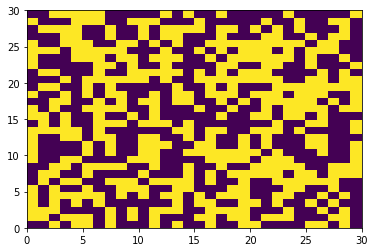

-5.5


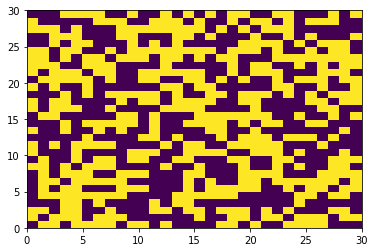

11.5


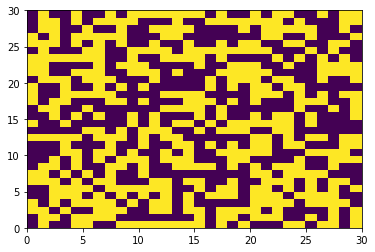

-18.5


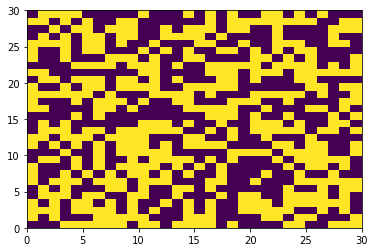

1.5


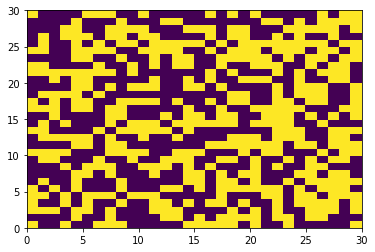

-5.5


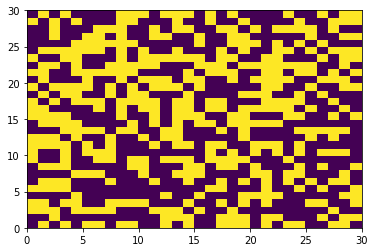

-3.5


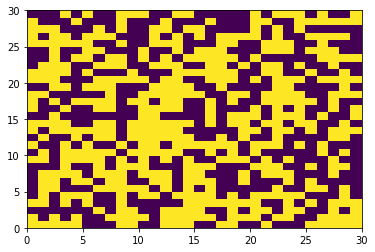

-19.5


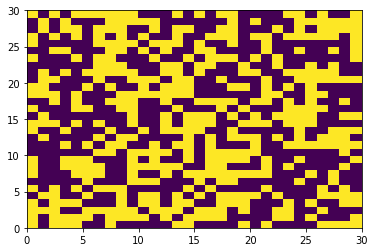

20.5


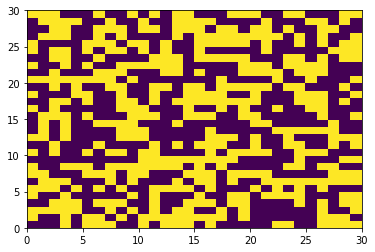

-0.5


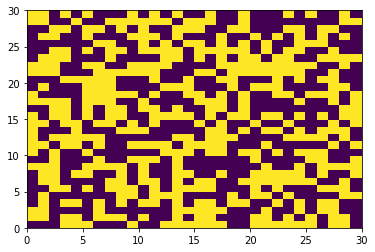

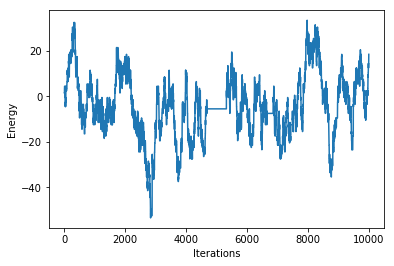

In [7]:
state, hList = Ising(3,0,10000)
plt.figure()
plt.plot(hList)
plt.xlabel('Iterations')
plt.ylabel('Energy')
plt.show()